In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data_full_hourres.xlsx')

In [4]:
df1 = df.copy()


# Firsly create a time series total load profile and generation

In [5]:
# Loads in the system are propulsion, battery charging and hotel load. 

# Add battery out to load and subtract battery in from production

# Maybe assume a hotel load for each Operation ID

#Create column of battery output and set negatives as zero
df1['Battery_Out'] = df1['battery_0__actualPower']
num = df1['Battery_Out']._get_numeric_data()
num[num < 0] = 0

#Create a colimn of load profile
df1['Load'] = df1['thrusterAndPropulsion'] + df1['Battery_Out']

In [6]:
display(df1)

,Unnamed: 0,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,...,engMdoPerformance_0_,engMdoPerformance_1_,engMdoPerformance_2_,engMdoPerformance_3_,engMdoConsumption_0_,engMdoConsumption_1_,engMdoConsumption_2_,engMdoConsumption_3_,Battery_Out,Load
0,0,2020-01-30 00:00:00,0.000000,0.000000,0.000000,250.000000,250.000000,0.000000,6.000000,0.000000,...,0.0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,1,2020-01-30 01:00:00,0.001944,0.000000,0.000000,250.000000,249.998056,0.000000,6.000000,0.000000,...,0.0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000,0.001944,0.001944
2,2,2020-01-30 02:00:00,-0.002222,0.000000,0.000000,250.000000,250.002222,0.000000,6.000000,0.000000,...,0.0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,3,2020-01-30 03:00:00,0.010556,0.000000,0.000000,250.000000,249.989444,0.000000,6.000000,0.000000,...,0.0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000,0.010556,0.010556
4,4,2020-01-30 04:00:00,-0.001944,0.000000,0.000000,250.000000,250.001944,0.000000,6.000000,0.000000,...,0.0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,2020-02-05 19:00:00,28.979167,1186.887778,1716.515556,558.606944,0.000000,1.000000,3.000000,0.000000,...,0.0,212.286921,0,0.000000,0.0,420.953403,0.0,0.000000,28.979167,1215.866944
164,164,2020-02-05 20:00:00,29.767222,1189.454444,1719.979167,560.291944,0.000000,1.000000,3.000000,0.000000,...,0.0,211.749076,0,0.000000,0.0,420.751292,0.0,0.000000,29.767222,1219.221667
165,165,2020-02-05 21:00:00,25.102500,1178.472778,1705.256667,551.886389,0.000000,1.000000,3.000000,0.000000,...,0.0,211.908229,0,0.000000,0.0,417.454139,0.0,0.000000,25.102500,1203.575278
166,166,2020-02-05 22:00:00,-128.794722,836.586197,1461.023333,495.642414,0.000000,1.886111,31.654167,0.561389,...,0.0,251.993469,0,226.913168,0.0,222.732625,0.0,175.224944,0.000000,836.586197


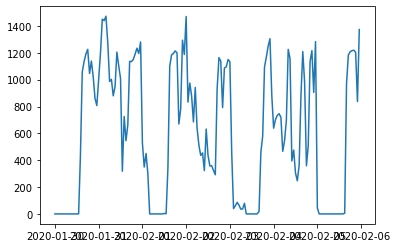

In [7]:
x = df1['datetime']
y = df1['Load']

plt.plot(x,y)

In [8]:
#Create dataset with only relevant columns
df2 = df1[['datetime', 'Load', 'engMdoPower_0_','engMdoPower_1_','engMdoPower_2_', 'engMdoPower_3_', 'operationId', 'hotelLoad']]

#Set engine powers to zero
num = df2['engMdoPower_0_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_1_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_2_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_3_']._get_numeric_data()
num[num != 0] = 0

num = df2['hotelLoad']._get_numeric_data()
num[num != 0] = 0
    

In [9]:
display(df2)

,datetime,Load,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_,operationId,hotelLoad
0,2020-01-30 00:00:00,0.000000,0.0,0.0,0,0.0,6.000000,0.0
1,2020-01-30 01:00:00,0.001944,0.0,0.0,0,0.0,6.000000,0.0
2,2020-01-30 02:00:00,0.000000,0.0,0.0,0,0.0,6.000000,0.0
3,2020-01-30 03:00:00,0.010556,0.0,0.0,0,0.0,6.000000,0.0
4,2020-01-30 04:00:00,0.000000,0.0,0.0,0,0.0,6.000000,0.0
...,...,...,...,...,...,...,...,...
163,2020-02-05 19:00:00,1215.866944,0.0,0.0,0,0.0,3.000000,0.0
164,2020-02-05 20:00:00,1219.221667,0.0,0.0,0,0.0,3.000000,0.0
165,2020-02-05 21:00:00,1203.575278,0.0,0.0,0,0.0,3.000000,0.0
166,2020-02-05 22:00:00,836.586197,0.0,0.0,0,0.0,31.654167,0.0


In [23]:
from  docplex.mp.model  import Model

m = Model(name='efficiency maximization')

load = np.zeros(168)
p1_efficiency = np.zeros(168)
p2_efficiency = np.zeros(168)
p3_efficiency = np.zeros(168)
p4_efficiency = np.zeros(168)

#Decision variables 
p1 = m.continuous_var_list(168)
p2 = m.continuous_var_list(168)
p3 = m.continuous_var_list(168)
p4 = m.continuous_var_list(168)

#Constrants

#Sum of power should meet load
for i in range(168):
    m.add_constraint(p1[i] + p2[i] + p3[i] + p4[i] == load[i])

#Max output of each generator is 2100 kW
for i in range(168):
    p1[i] <= 2100
    p2[i] <= 2100
    p3[i] <= 2100
    p4[i] <= 2100

# Efficiency calculation

for i in range(168):
    p1_efficiency[i] = 2.5 * p1[i]
    p2_efficiency[i] = 0.4*p2[i]+0.21
    p3_efficiency[i] = 0.01*p3[i]+0.366
    p4_efficiency[i] = 2.5 * p4[i]
    '''
    #p1
    if p1[i] <= 0.1:
        p1_efficiency[i] = 2.5 * p1[i]
    elif p1[i] <= 0.3:
        p1_efficiency[i] = 0.4*p1[i]+0.21
    elif p1[i] <= 0.4:
        p1_efficiency[i] = 0.3*p1[i]+0.25
    elif p1[i] <= 1:
        p1_efficiency[i] = 0.01*p1[i]+0.366
        
    #p2
    if p2[i] <= 0.1:
        p2_efficiency[i] = 2.5 * p2[i]
    elif p2[i] <= 0.3:
        p2_efficiency[i] = 0.4*p2[i]+0.21
    elif p2[i] <= 0.4:
        p2_efficiency[i] = 0.3*p2[i]+0.25
    elif p2[i] <= 1:
        p2_efficiency[i] = 0.01*p2[i]+0.366
    
    #p3
    if p3[i] <= 0.1:
        p3_efficiency[i] = 2.5 * p3[i]
    elif p3[i] <= 0.3:
        p3_efficiency[i] = 0.4*p3[i]+0.21
    elif p3[i] <= 0.4:
        p3_efficiency[i] = 0.3*p3[i]+0.25
    elif p3[i] <= 1:
        p3_efficiency[i] = 0.01*p3[i]+0.366
        
    #p4
    if p4[i] <= 0.1:
        p4_efficiency[i] = 2.5 * p4[i]
    elif p4[i] <= 0.3:
        p4_efficiency[i] = 0.4*p4[i]+0.21
    elif p4[i] <= 0.4:
        p4_efficiency[i] = 0.3*p4[i]+0.25
    elif p4[i] <= 1:
        p4_efficiency[i] = 0.01*p4[i]+0.366
    '''
# objective function
efficiency = p1_efficiency + p2_efficiency + p3_efficiency + p4_efficiency

m.maximize(efficiency)


ValueError: setting an array element with a sequence.